<a href="https://colab.research.google.com/github/Hussein-Ahmad-94/Tasks/blob/main/combined_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read the artificial datasets that combined of stock price and temperature for a city with respect time frame that start from

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Load and preprocess the data
data = pd.read_csv('/content/artificial data.csv')

data.head(10)

,datetime,price,temperature
0,1/1/1970,171,21
1,1/2/1970,163,21
2,1/3/1970,117,27
3,1/4/1970,145,25
4,1/5/1970,110,24
5,1/6/1970,131,10
6,1/7/1970,193,16
7,1/8/1970,132,29
8,1/9/1970,152,21
9,1/10/1970,110,14


# Data Preproceessing:

*   Splitting the data into training and test sets
*   Scaling Transformation








In [ ]:
# Splitting the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Scaling the temperature and price variables
scaler_temp = StandardScaler()
train_scaled_temp = scaler_temp.fit_transform(train_data[['temperature']])
test_scaled_temp = scaler_temp.transform(test_data[['temperature']])

scaler_price = StandardScaler()
train_scaled_price = scaler_price.fit_transform(train_data[['price']])
test_scaled_price = scaler_price.transform(test_data[['price']])


# Building Models

*   **Model 1** NNet for Temperature Prediction
*   **Model 2** NNet for Price Prediction



# Calculation of the loss

In [ ]:
# Calculate loss for each model
temp_loss = model_temp.evaluate(test_scaled_temp, test_data['temperature'], verbose=0)
price_loss = model_price.evaluate(test_scaled_price, test_data['price'], verbose=0)

print(f"Temperature Model Loss: {temp_loss}")
print(f"Price Model Loss: {price_loss}")

Temperature Model Loss: 4.0623036184905814e-11
Price Model Loss: 5.010256813875458e-07


# Combined Loss

In [ ]:
# Define a combined loss function
def combined_loss(loss1, loss2, weight1, weight2):
    return weight1 * loss1 + weight2 * loss2

In [ ]:
combined_loss_avg = combined_loss(temp_loss,price_loss, 0.5,0.5)

print(f"Combined Loss (Average): {combined_loss_avg}")

Combined Loss (Average): 2.5053315221186534e-07


In [ ]:
combined_loss_weighted = combined_loss(temp_loss,price_loss, 0.7,0.3)

print(f"Combined Loss (Weighted): {combined_loss_weighted}")

Combined Loss (Weighted): 1.5033614054159317e-07


In [ ]:
# Model 1: Neural Network for Temperature Prediction
model_temp = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model_temp.compile(optimizer='adam', loss='mean_squared_error')
model_temp.fit(train_scaled_temp, train_data['temperature'], epochs=100, verbose=0)

# Model 2: Neural Network for Price Prediction
model_price = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model_price.compile(optimizer='adam', loss='mean_squared_error')
model_price.fit(train_scaled_price, train_data['price'], epochs=100, verbose=0)

# Trial

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path of your dataset
data = pd.read_csv('/content/artificial data.csv')

# Split the data into features (temperature) and target (stock price change)
features = data['Temperature'].values.reshape(-1, 1)
target = data['StockPriceChange'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Neural Network model
model_nn = Sequential()
model_nn.add(Dense(units=32, activation='relu', input_dim=1))
model_nn.add(Dense(units=16, activation='relu'))
model_nn.add(Dense(units=1))

# Random Forest model
model_rf = RandomForestRegressor(n_estimators=100)

# Train Neural Network
model_nn.compile(loss='mean_squared_error', optimizer='adam')
model_nn.fit(X_train, y_train, epochs=10, batch_size=8, verbose=0)

# Train Random Forest
model_rf.fit(X_train, y_train)

# Predict using Neural Network
predicted_changes_nn = model_nn.predict(X_test)

# Predict using Random Forest
predicted_changes_rf = model_rf.predict(X_test)

# Print predictions from both models
for i, (pred_nn, pred_rf) in enumerate(zip(predicted_changes_nn, predicted_changes_rf)):
    print(f"Example {i + 1}: Neural Network Prediction: {pred_nn[0]:.2f}, Random Forest Prediction: {pred_rf:.2f}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path of your dataset
data = pd.read_csv('/content/artificial data.csv')


In [ ]:
data.head(10)

,datetime,price,temperature
0,1/1/1970,171,21
1,1/2/1970,163,21
2,1/3/1970,117,27
3,1/4/1970,145,25
4,1/5/1970,110,24
5,1/6/1970,131,10
6,1/7/1970,193,16
7,1/8/1970,132,29
8,1/9/1970,152,21
9,1/10/1970,110,14


In [ ]:
data.columns

Index(['datetime', 'price', 'temperature'], dtype='object')

In [ ]:
# Split the data into features (temperature) and target (stock price change)
features = data['temperature'].values.reshape(-1, 1)
target = data['price'].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [ ]:
# Neural Network model
model_nn = Sequential()
model_nn.add(Dense(units=32, activation='relu', input_dim=1))
model_nn.add(Dense(units=16, activation='relu'))
model_nn.add(Dense(units=1))

In [ ]:
# Random Forest model
model_rf = RandomForestRegressor(n_estimators=100)

In [ ]:
# Train Neural Network
model_nn.compile(loss='mean_squared_error', optimizer='adam')
model_nn.fit(X_train, y_train, epochs=10, batch_size=8, verbose=0)


In [ ]:
# Train Random Forest
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predict using Neural Network
predicted_changes_nn = model_nn.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
# Predict using Random Forest
predicted_changes_rf = model_rf.predict(X_test)

In [ ]:
# Print predictions from both models
for i, (pred_nn, pred_rf) in enumerate(zip(predicted_changes_nn, predicted_changes_rf)):
    print(f"Example {i + 1}: Neural Network Prediction: {pred_nn[0]:.2f}, Random Forest Prediction: {pred_rf:.2f}")

Example 1: Neural Network Prediction: 151.21, Random Forest Prediction: 150.06
Example 2: Neural Network Prediction: 150.98, Random Forest Prediction: 147.72
Example 3: Neural Network Prediction: 150.83, Random Forest Prediction: 148.72
Example 4: Neural Network Prediction: 151.36, Random Forest Prediction: 149.79
Example 5: Neural Network Prediction: 152.04, Random Forest Prediction: 149.84
Example 6: Neural Network Prediction: 150.98, Random Forest Prediction: 147.72
Example 7: Neural Network Prediction: 151.97, Random Forest Prediction: 148.29
Example 8: Neural Network Prediction: 151.59, Random Forest Prediction: 153.20
Example 9: Neural Network Prediction: 151.14, Random Forest Prediction: 150.54
Example 10: Neural Network Prediction: 151.44, Random Forest Prediction: 150.79
Example 11: Neural Network Prediction: 150.76, Random Forest Prediction: 146.58
Example 12: Neural Network Prediction: 151.89, Random Forest Prediction: 149.39
Example 13: Neural Network Prediction: 151.97, Ra

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse_nn = mean_squared_error(y_test, predicted_changes_nn)
mae_nn = mean_absolute_error(y_test, predicted_changes_nn)
r2_nn = r2_score(y_test, predicted_changes_nn)

mse_rf = mean_squared_error(y_test, predicted_changes_rf)
mae_rf = mean_absolute_error(y_test, predicted_changes_rf)
r2_rf = r2_score(y_test, predicted_changes_rf)

# Print evaluation metrics
print("Neural Network Model:")
print(f"Mean Squared Error: {mse_nn:.2f}")
print(f"Mean Absolute Error: {mae_nn:.2f}")
print(f"R-squared: {r2_nn:.2f}")

print("\nRandom Forest Model:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")


Neural Network Model:
Mean Squared Error: 839.67
Mean Absolute Error: 25.10
R-squared: -0.00

Random Forest Model:
Mean Squared Error: 843.42
Mean Absolute Error: 25.16
R-squared: -0.01


# III:


In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path of your dataset
data = pd.read_csv('/content/artificial data.csv')

# Split the data into features (temperature) and target (stock price change)
features = data['temperature'].values.reshape(-1, 1)
target = data['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# 1st Model: LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=32, activation='relu', input_shape=(1, 1)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train.reshape(-1, 1, 1), y_train, epochs=10, batch_size=8, verbose=0)

# 2nd Model: ARIMA
# Assuming you have a time series array 'target' for ARIMA
# Replace p, d, q with appropriate ARIMA order parameters
order = (p, d, q)
model_arima = ARIMA(target, order=order)
model_arima_fit = model_arima.fit()

# Generate predictions from the trained models
predicted_changes_lstm = model_lstm.predict(X_test.reshape(-1, 1, 1))
predicted_changes_arima = model_arima_fit.forecast(steps=len(X_test))[0]

# Now you can proceed to the combined model as previously explained


NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Combine predictions of both models
combined_predictions = np.column_stack((predicted_changes_lstm, predicted_changes_arima))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_predictions, target, test_size=0.2, random_state=0)

# Combined model
model_combined = Sequential()
model_combined.add(Dense(units=32, activation='relu', input_dim=2))  # Two inputs: LSTM and ARIMA predictions
model_combined.add(Dense(units=16, activation='relu'))
model_combined.add(Dense(units=1))  # Final output

# Compile combined model
model_combined.compile(loss='mean_squared_error', optimizer='adam')

# Train combined model using combined predictions
model_combined.fit(X_train, y_train, epochs=10, batch_size=8, verbose=0)

# Evaluate the combined model
loss_combined = model_combined.evaluate(X_test, y_test)
print(f"Combined Model Loss: {loss_combined:.2f}")


# Combined loss

### I
**Model 1** Linear Regression

**Model 2** ARIMA

**Combined Model** Random Forest

Linear Regression RMSE: 28.98
ARIMA RMSE: 28.98
Random Forest RMSE: 29.05
Combined Model RMSE: 28.98


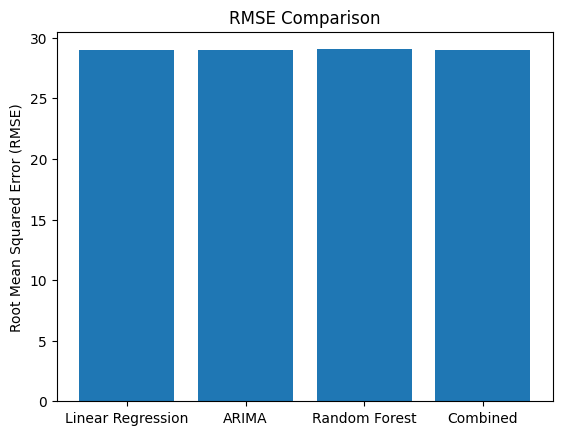

In [46]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/artificial data.csv')

# Split the data into features (temperature) and target (stock price change)
features = data['temperature'].values.reshape(-1, 1)
target = data['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# 1st Model: Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predicted_changes_lr = model_lr.predict(X_test)

# 2nd Model: ARIMA
# Assuming you have a time series array 'target' for ARIMA
p, d, q = 1, 1, 1  # Replace with appropriate ARIMA order parameters
model_arima = ARIMA(target, order=(p, d, q))
model_arima_fit = model_arima.fit()
predicted_changes_arima = model_arima_fit.forecast(steps=len(X_test))
predicted_changes_arima = predicted_changes_arima.reshape(-1, 1)

# Combine predictions of Linear Regression and ARIMA
combined_predictions = np.concatenate((predicted_changes_lr.reshape(-1, 1), predicted_changes_arima), axis=1)

# 3rd Model: Random Forest
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
predicted_changes_rf = model_rf.predict(X_test)

# Calculate RMSE for each model's predictions
rmse_lr = np.sqrt(np.mean(np.square(predicted_changes_lr - y_test)))
rmse_arima = np.sqrt(np.mean(np.square(predicted_changes_arima.flatten() - y_test)))
rmse_rf = np.sqrt(np.mean(np.square(predicted_changes_rf - y_test)))
rmse_combined = np.sqrt(np.mean(np.square(combined_predictions[:, 0] - y_test)))

# Print RMSE for each model
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"ARIMA RMSE: {rmse_arima:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Combined Model RMSE: {rmse_combined:.2f}")

# Plot RMSE comparison
plt.bar(['Linear Regression', 'ARIMA', 'Random Forest', 'Combined'], [rmse_lr, rmse_arima, rmse_rf, rmse_combined])
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Comparison')
plt.show()


# I prime:

**Model 1** Linear Regression

**Model 2** Random Forest

**Combined Model** Support Vector Machine


Linear Regression RMSE: 28.98
Random Forest RMSE: 29.05
SVM RMSE: 28.98


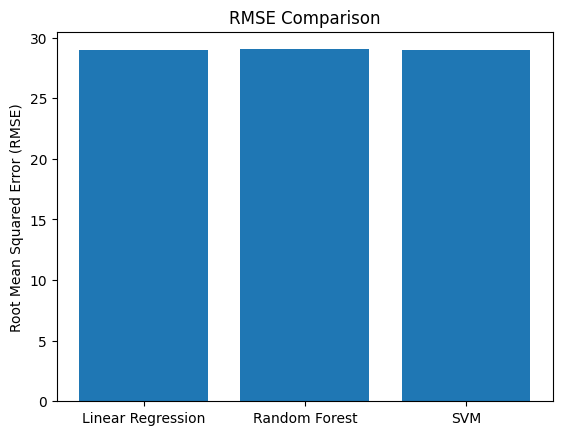

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/artificial data.csv')

# Split the data into features (temperature) and target (stock price change)
features = data['temperature'].values.reshape(-1, 1)
target = data['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# 1st Model: Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predicted_changes_lr = model_lr.predict(X_test)

# 2nd Model: Random Forest
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
predicted_changes_rf = model_rf.predict(X_test)

# 3rd Model: Support Vector Machine (SVM)
model_svm = SVR(kernel='linear')
model_svm.fit(X_train, y_train)
predicted_changes_svm = model_svm.predict(X_test)

# Calculate RMSE for each model's predictions
rmse_lr = np.sqrt(np.mean(np.square(predicted_changes_lr - y_test)))
rmse_rf = np.sqrt(np.mean(np.square(predicted_changes_rf - y_test)))
rmse_svm = np.sqrt(np.mean(np.square(predicted_changes_svm - y_test)))

# Print RMSE for each model
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"SVM RMSE: {rmse_svm:.2f}")

# Plot RMSE comparison
plt.bar(['Linear Regression', 'Random Forest', 'SVM'],
        [rmse_lr, rmse_rf, rmse_svm])
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Comparison')
plt.show()


### II:

**Model 1** LSTM

**Model 2** ARIMA

**Combined Model** NNet


In [30]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import keras.backend as K

# Define custom loss function
def combined_loss(y_true, y_pred):
    # Split the concatenated predictions back into separate predictions
    predicted_changes_lstm = y_pred[:, :1]
    predicted_changes_arima = y_pred[:, 1:]

    # Convert y_true to float32
    y_true = K.cast(y_true, 'float32')

    # Custom loss calculation
    custom_loss = K.square(predicted_changes_lstm - y_true) + K.square(predicted_changes_arima - y_true)
    return K.mean(custom_loss)


# Load your dataset
# Replace 'your_dataset.csv' with the actual file path of your dataset
data = pd.read_csv('/content/artificial data.csv')

# Split the data into features (temperature) and target (stock price change)
features = data['temperature'].values.reshape(-1, 1)
target = data['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# 1st Model: LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=32, activation='relu', input_shape=(1, 1)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train.reshape(-1, 1, 1), y_train, epochs=10, batch_size=8, verbose=0)

# 2nd Model: ARIMA
# Assuming you have a time series array 'target' for ARIMA
p, d, q = 1, 1, 1  # Replace with appropriate ARIMA order parameters
model_arima = ARIMA(target, order=(p, d, q))
model_arima_fit = model_arima.fit()

# Generate predictions from the trained models
predicted_changes_lstm = model_lstm.predict(X_test.reshape(-1, 1, 1))
predicted_changes_arima = model_arima_fit.forecast(steps=len(X_test))

# Ensure both arrays have matching dimensions
predicted_changes_arima = predicted_changes_arima.reshape(-1, 1)

# Combine predictions of both models
combined_predictions = np.concatenate((predicted_changes_lstm, predicted_changes_arima), axis=1)

# Combined model with custom loss
model_combined = Sequential()
model_combined.add(Dense(units=32, activation='relu', input_dim=2))  # Two inputs: LSTM and ARIMA predictions
model_combined.add(Dense(units=16, activation='relu'))
model_combined.add(Dense(units=1))  # Final output

# Compile combined model with custom loss
model_combined.compile(optimizer='adam', loss=combined_loss)

# Train combined model using combined predictions
model_combined.fit(combined_predictions, y_test, epochs=10, batch_size=8, verbose=0)


63/63 [==============================] - 0s 2ms/step


LSTM Testing Loss: 925.51


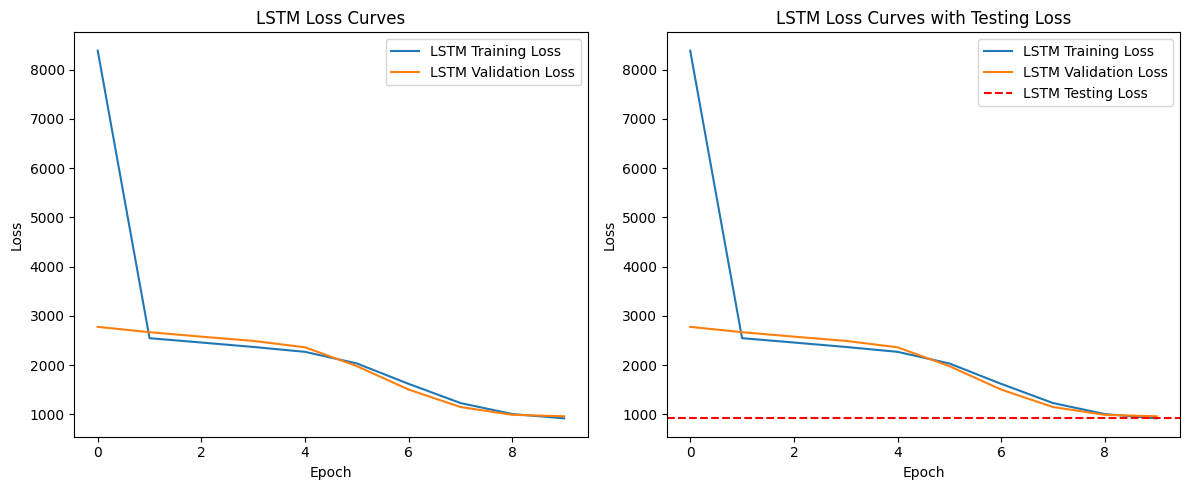

In [39]:
# Plot loss curves for LSTM model
plt.figure(figsize=(12, 5))

# Plot LSTM training and validation loss curves
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Loss Curves')
plt.legend()

# Plot LSTM testing loss
lstm_testing_loss = model_lstm.evaluate(X_test.reshape(-1, 1, 1), y_test, verbose=0)
print(f"LSTM Testing Loss: {lstm_testing_loss:.2f}")

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.axhline(y=lstm_testing_loss, color='r', linestyle='--', label='LSTM Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Loss Curves with Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()


LSTM RMSE: 30.42
ARIMA RMSE: 28.98
Combined Model RMSE: 30.42


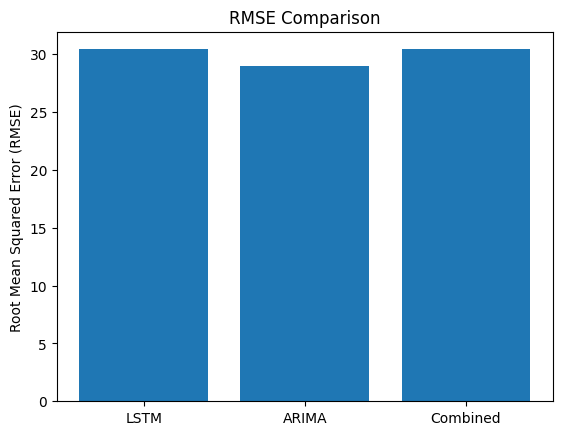

In [42]:
# Calculate RMSE for each model's predictions
rmse_lstm = np.sqrt(np.mean(np.square(predicted_changes_lstm.flatten() - y_test)))
rmse_arima = np.sqrt(np.mean(np.square(predicted_changes_arima.flatten() - y_test)))
rmse_combined = np.sqrt(np.mean(np.square(combined_predictions[:, 0] - y_test)))

# Print RMSE for each model
print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"ARIMA RMSE: {rmse_arima:.2f}")
print(f"Combined Model RMSE: {rmse_combined:.2f}")

# Plot RMSE comparison
plt.bar(['LSTM', 'ARIMA', 'Combined'], [rmse_lstm, rmse_arima, rmse_combined])
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Comparison')
plt.show()

# III prime

**Model 1** NNet (1)

**Model 2** NNet (2)

63/63 [==============================] - 0s 2ms/step


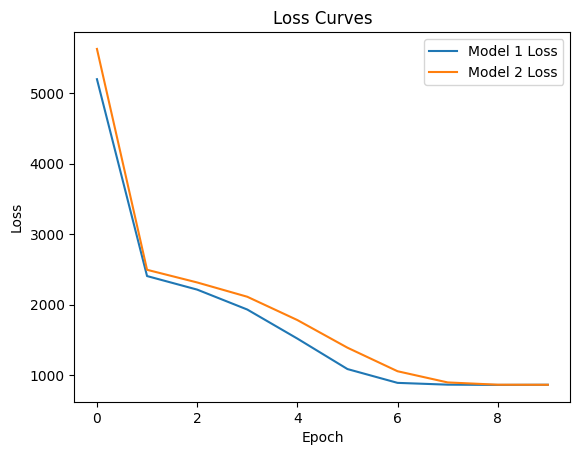

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

# Define custom loss function for the first model
def custom_loss(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # Cast y_true to float32
    return K.mean(K.square(y_pred - y_true))

# Define custom loss function for the second model
def custom_loss_model2(y_true, y_pred):
    # Assuming y_pred has shape (batch_size, 1)
    y_pred = K.reshape(y_pred, (-1,))  # Flatten y_pred
    y_true = K.cast(y_true, 'float32')  # Cast y_true to float32
    return K.mean(K.square(y_pred - y_true))

# Load your dataset
data = pd.read_csv('/content/artificial data.csv')

# Split the data into features (temperature) and target (stock price change)
features = data['temperature'].values.reshape(-1, 1)
target = data['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# 1st Model: Neural Network
model_nn_1 = Sequential()
model_nn_1.add(Dense(units=32, activation='relu', input_dim=1))
model_nn_1.add(Dense(units=16, activation='relu'))
model_nn_1.add(Dense(units=1))
model_nn_1.compile(optimizer='adam', loss=custom_loss)
history_nn_1 = model_nn_1.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2, verbose=0)

# Get predictions from the Neural Network model 1
predicted_changes_nn_model1 = model_nn_1.predict(X_test)

# 2nd Model: Neural Network with loss from model 1
model_nn_2 = Sequential()
model_nn_2.add(Dense(units=32, activation='relu', input_dim=1))
model_nn_2.add(Dense(units=16, activation='relu'))
model_nn_2.add(Dense(units=1))
model_nn_2.compile(optimizer='adam', loss=custom_loss_model2)  # Use the custom loss function for model 2
history_nn_2 = model_nn_2.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2, verbose=0)

# Plot loss curves for both models
plt.plot(history_nn_1.history['loss'], label='Model 1 Loss')
plt.plot(history_nn_2.history['loss'], label='Model 2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()
